In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('sales.csv')

In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.shape

(1000, 17)

In [6]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

--- EDA ---

In [15]:
# Convert Date and Time columns to appropriate datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Instead of directly using pd.to_datetime, apply a custom function to handle the inconsistencies
def convert_time(time_str):
    if isinstance(time_str, str) and time_str.startswith(":"): # Check if it's a string first
        time_str = "00" + time_str  # Add "00" to the beginning if it starts with ":"
    # If it's already a datetime.time object or a correctly formatted string, no changes are made
    return pd.to_datetime(time_str, format="%H:%M", errors='ignore').time() if isinstance(time_str, str) else time_str

df["Time"] = df["Time"].apply(convert_time)

# Generate descriptive statistics
desc_stats = df.describe()

desc_stats

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


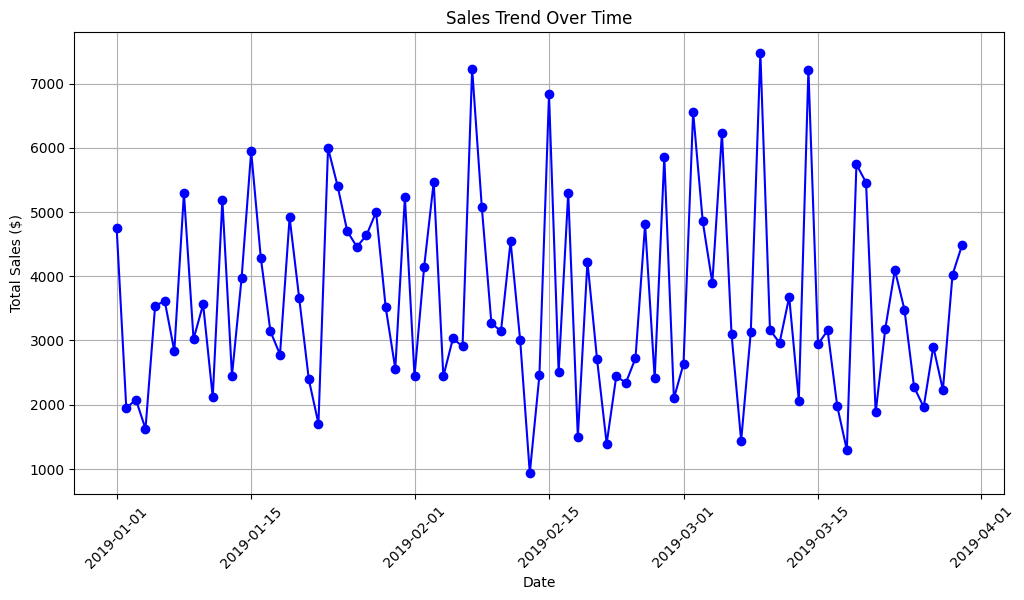

In [16]:
import matplotlib.pyplot as plt

# Aggregate sales by date
df_sales_trend = df.groupby("Date")["Total"].sum()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df_sales_trend.index, df_sales_trend.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


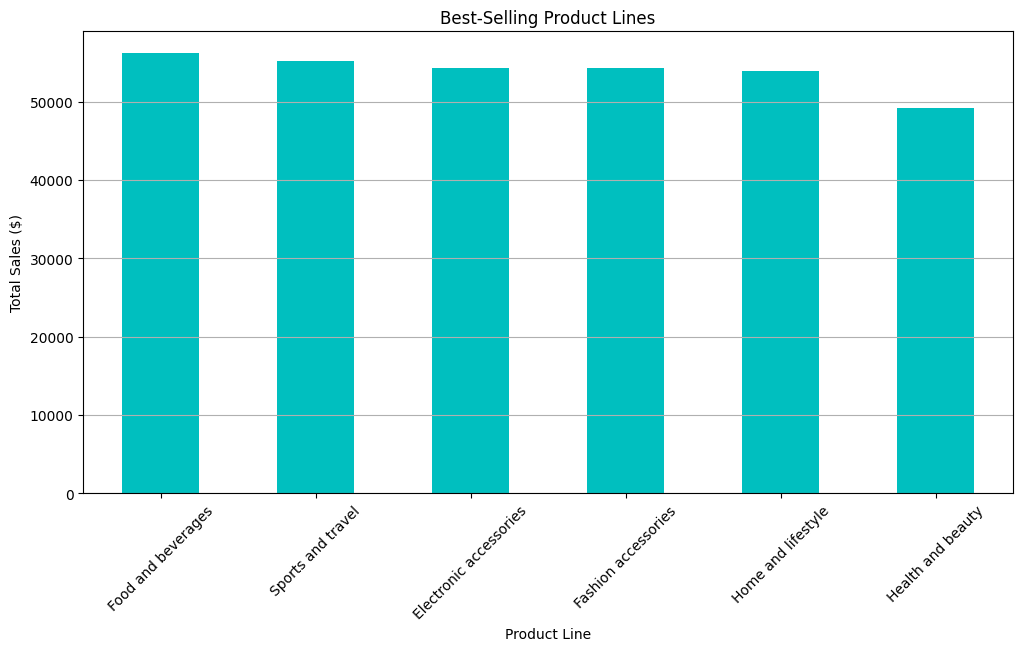

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


In [17]:
# Aggregate total sales by product line
product_sales = df.groupby("Product line")["Total"].sum().sort_values(ascending=False)

# Plot best-selling product lines
plt.figure(figsize=(12, 6))
product_sales.plot(kind="bar", color="c")
plt.xlabel("Product Line")
plt.ylabel("Total Sales ($)")
plt.title("Best-Selling Product Lines")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Display top product lines
product_sales


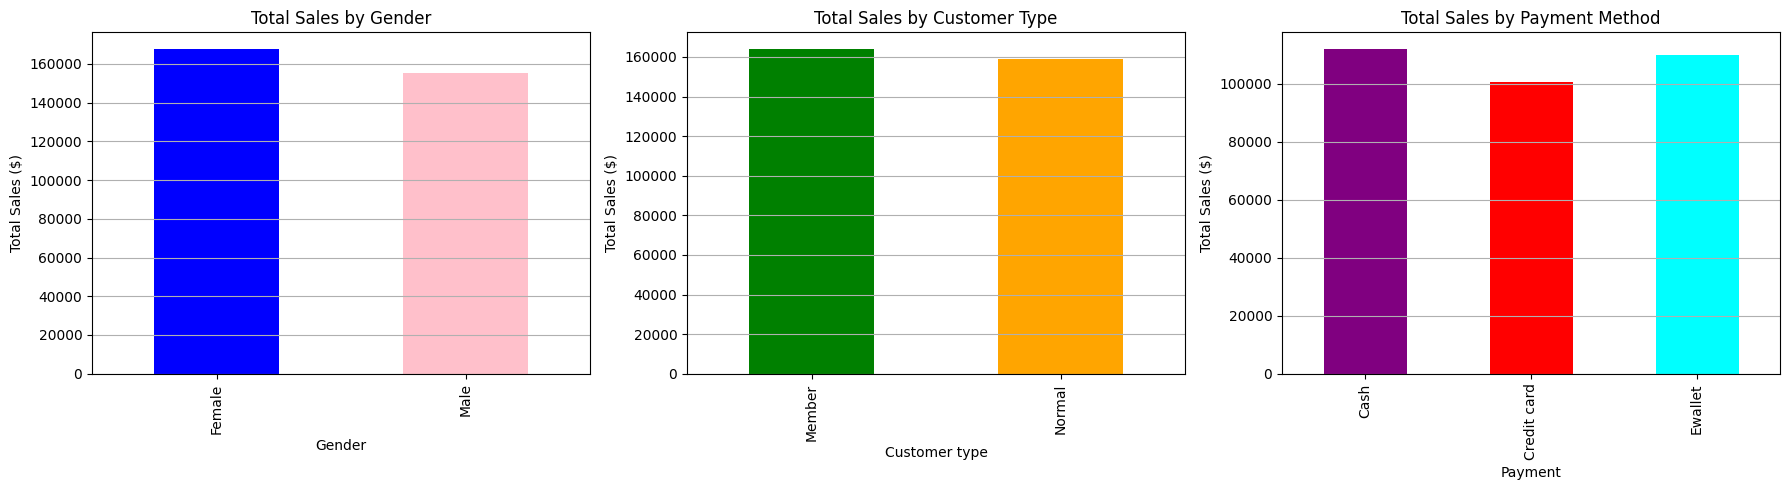

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64 

 Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64 

 Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64


In [30]:
# Sales distribution by gender
gender_sales = df.groupby("Gender")["Total"].sum()

# Sales distribution by customer type
customer_type_sales = df.groupby("Customer type")["Total"].sum()

# Sales distribution by payment method
payment_sales = df.groupby("Payment")["Total"].sum()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender Sales
gender_sales.plot(kind="bar", color=["blue", "pink"], ax=axes[0])
axes[0].set_title("Total Sales by Gender")
axes[0].set_ylabel("Total Sales ($)")
axes[0].grid(axis="y")

# Customer Type Sales
customer_type_sales.plot(kind="bar", color=["green", "orange"], ax=axes[1])
axes[1].set_title("Total Sales by Customer Type")
axes[1].set_ylabel("Total Sales ($)")
axes[1].grid(axis="y")

# Payment Method Sales
payment_sales.plot(kind="bar", color=["purple", "red", "cyan"], ax=axes[2])
axes[2].set_title("Total Sales by Payment Method")
axes[2].set_ylabel("Total Sales ($)")
axes[2].grid(axis="y")

plt.tight_layout()
plt.show()

print(gender_sales,"\n\n", customer_type_sales,"\n\n", payment_sales)


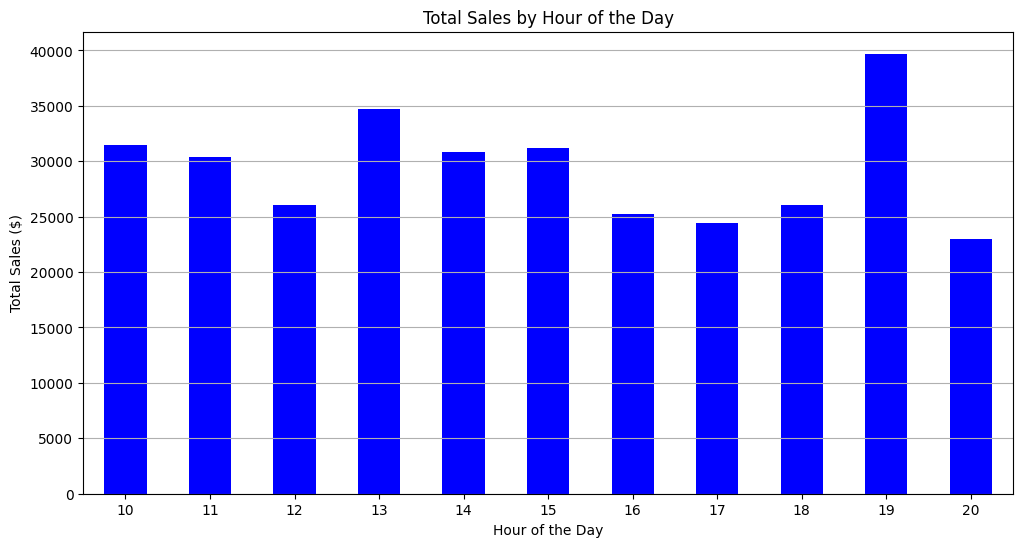

,Total
Hour,
10,31421.4810
11,30377.3295
12,26065.8825
13,34723.2270
14,30828.3990
15,31179.5085
16,25226.3235
17,24445.2180
18,26030.3400


In [31]:
# Extract hour from Time column
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

# Aggregate sales by hour
hourly_sales = df.groupby("Hour")["Total"].sum()

# Plot sales by hour
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind="bar", color="blue")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Hour of the Day")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

hourly_sales


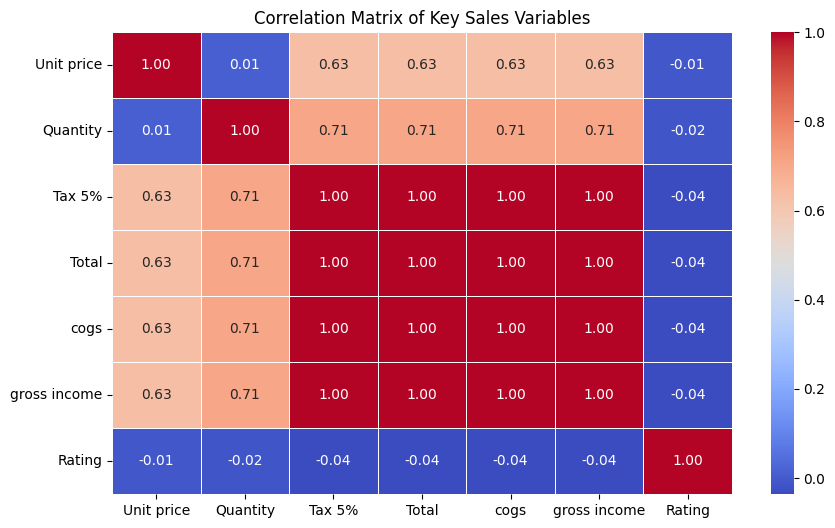

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


In [32]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df[["Unit price", "Quantity", "Tax 5%", "Total", "cogs", "gross income", "Rating"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Sales Variables")
plt.show()

correlation_matrix


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


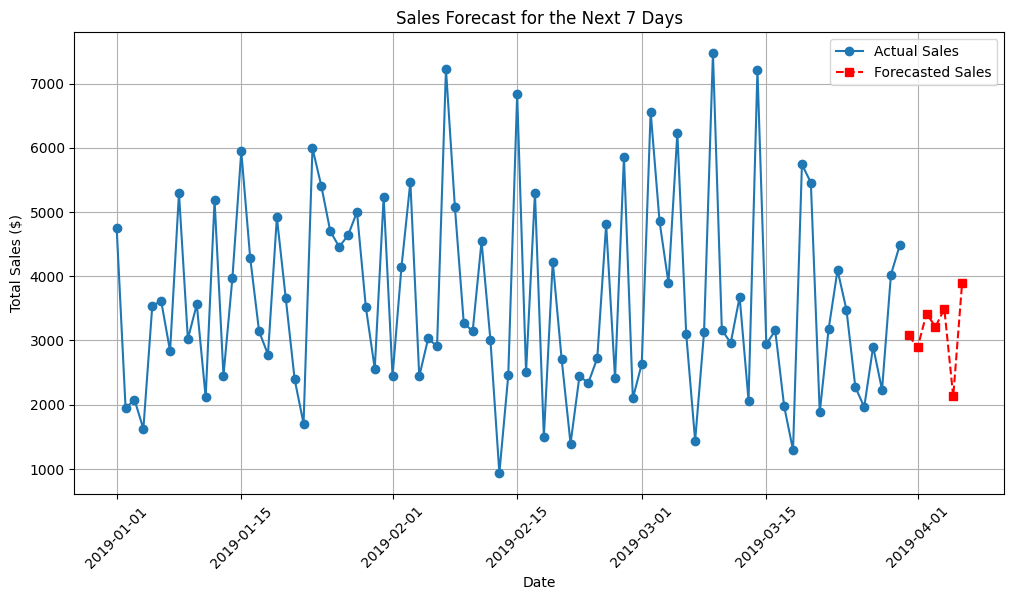

,0
2019-03-31,3077.396072
2019-04-01,2891.207190
2019-04-02,3417.860559
2019-04-03,3212.526272
2019-04-04,3488.595435
2019-04-05,2127.361230
2019-04-06,3899.749689


In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Aggregate sales by date for forecasting
df_forecast = df.groupby("Date")["Total"].sum()

# Fit an exponential smoothing model
model = ExponentialSmoothing(df_forecast, trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

# Predict the next 7 days
forecast = fit.forecast(7)

# Plot actual vs. predicted sales
plt.figure(figsize=(12, 6))
plt.plot(df_forecast.index, df_forecast.values, label="Actual Sales", marker="o")
plt.plot(forecast.index, forecast.values, label="Forecasted Sales", linestyle="dashed", marker="s", color="red")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Sales Forecast for the Next 7 Days")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

forecast


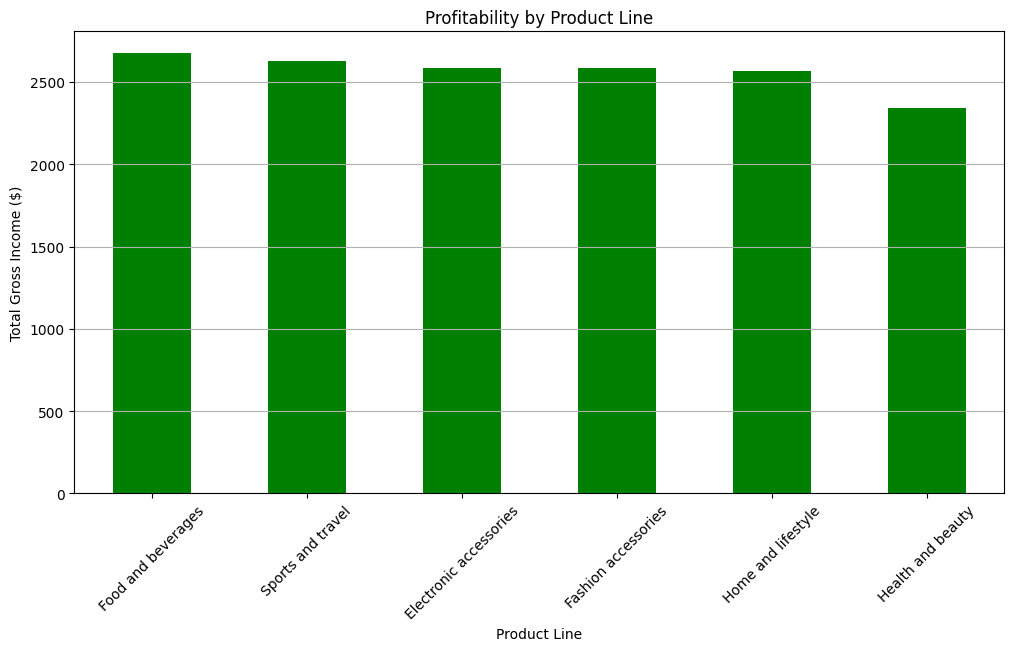

,gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


In [34]:
# Aggregate profit (gross income) by product line
product_profit = df.groupby("Product line")["gross income"].sum().sort_values(ascending=False)

# Plot profit per product line
plt.figure(figsize=(12, 6))
product_profit.plot(kind="bar", color="green")
plt.xlabel("Product Line")
plt.ylabel("Total Gross Income ($)")
plt.title("Profitability by Product Line")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Display top profitable product lines
product_profit


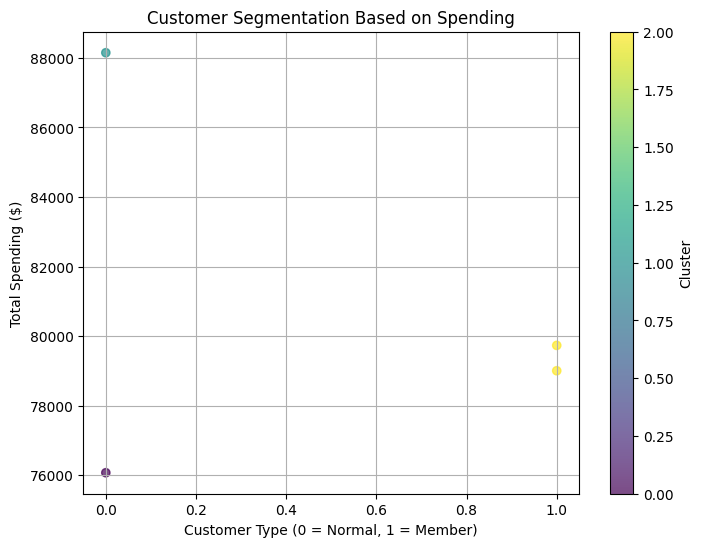

,Customer type,Gender,Total,Cluster
0,0,0,88146.9435,1
1,0,1,76076.5005,0
2,1,0,79735.9815,2
3,1,1,79007.3235,2


In [35]:
from sklearn.cluster import KMeans
import numpy as np

# Aggregate total spending per customer type & gender
customer_data = df.groupby(["Customer type", "Gender"])["Total"].sum().reset_index()

# Prepare data for clustering (converting categorical to numerical)
customer_data["Customer type"] = customer_data["Customer type"].astype("category").cat.codes
customer_data["Gender"] = customer_data["Gender"].astype("category").cat.codes

# Apply K-Means clustering to group similar customers
X = customer_data[["Customer type", "Gender", "Total"]]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(customer_data["Customer type"], customer_data["Total"], c=customer_data["Cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("Customer Type (0 = Normal, 1 = Member)")
plt.ylabel("Total Spending ($)")
plt.title("Customer Segmentation Based on Spending")
plt.grid(True)
plt.show()

# Display segmented customer groups
customer_data


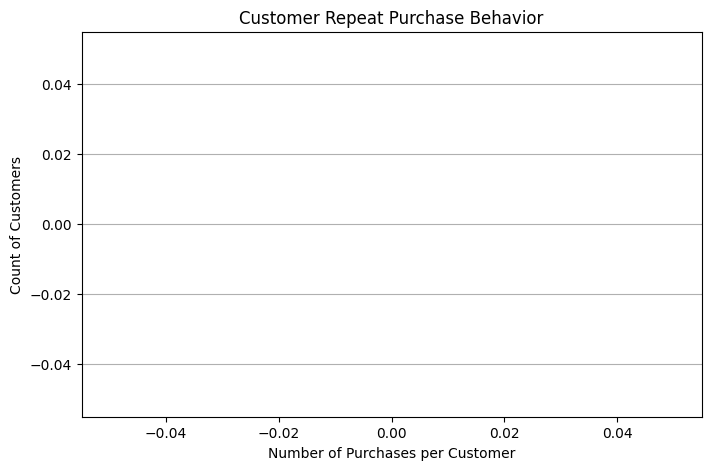

0.0

In [37]:
# Analyze repeat purchases based on Invoice ID
repeat_purchases = df["Invoice ID"].value_counts()

# Percentage of customers with multiple purchases
repeat_customers = (repeat_purchases > 1).sum() / len(repeat_purchases) * 100

# Plot distribution of purchase frequency
plt.figure(figsize=(8, 5))
plt.hist(repeat_purchases, bins=range(1, repeat_purchases.max() + 1), color="blue", alpha=0.7, edgecolor="black")
plt.xlabel("Number of Purchases per Customer")
plt.ylabel("Count of Customers")
plt.title("Customer Repeat Purchase Behavior")
plt.grid(axis="y")
plt.show()

# Display percentage of repeat customers
repeat_customers
